In [1]:
import heeps
from heeps.wavefront.get_array import show_wf
from astropy.io import fits
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir(os.path.normpath(os.path.expandvars('$HOME/heeps_metis/input_files/pupil/rap')))

# SCAO size minus 1, because even number
npupil = 719
conf = heeps.config.read_config(npupil=npupil, verbose=True)
wf = heeps.pupil.pupil(**conf, verbose=True)
wf = heeps.optics.apodizer(wf, **conf, verbose=True, save_ring=True)
name = 'apo_ring_r=%.4f_t=%.4f.fits'%(conf['ravc_r'], conf['ravc_t'])
ring = fits.getdata(name)
# need to pad 1 col and row due to SCAO even size
ring = np.pad(ring, [(1, 0), (1, 0)], mode='constant', constant_values=conf['ravc_t'])
fits.writeto(name, ring, overwrite=True)

Default config: band=L, mode=RAVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   npupil=719, pscale=5.47 mas, lam=3.8100E-06 m
   ndet=365 (-> hfov=1.0 arcsec, 46.88 lam/D)

Entrance pupil: loaded from 'ELT_fullM1.fits'
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   apply ring apodizer: ravc_t=0.7909, ravc_r=0.519, apo_misalign=None


In [3]:
apo_misalign = 0.05
conf = dict(
    ngrid = 2048,
    hfov = 0.8,
    add_phase = False,
    nframes = 1,
    apo_misalign = [apo_misalign, 0],
)

In [4]:
conf = heeps.config.read_config(**conf)
conf = heeps.config.update_config(**conf, verbose=True)
wf = heeps.pupil.pupil(**conf)
peak = np.max(heeps.wavefront.propagate(wf, onaxis=False, **conf))
print('\npeak =', peak)

Simulation config: band=L, mode=RAVC
‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
   loading vortex back-propagation params
   vc_charge=2, ngrid=2048, diam_norm=1.0838, beam_ratio=0.2572
   ravc_calc=False, ravc_t=0.7909, ravc_r=0.5190
   npupil=571, pscale=5.4700 mas, lam=3.8045E-06 m
   hfov=0.8 arcsec (-> ndet=293, 37.69 lam/D)

   2024-11-18 13:25:29, e2e simulation using 12 cores
   2024-11-18 13:25:34, completed in 5.21 seconds

peak = 0.010542152781607743


<Figure size 432x288 with 0 Axes>

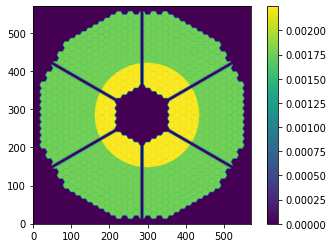

<Figure size 432x288 with 0 Axes>

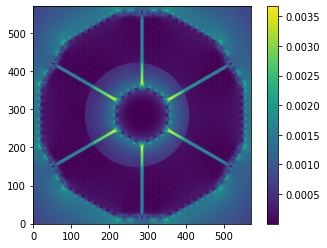

<Figure size 432x288 with 0 Axes>

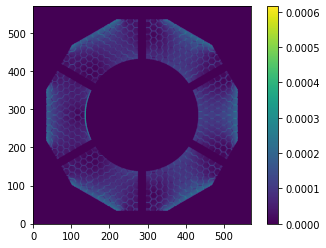

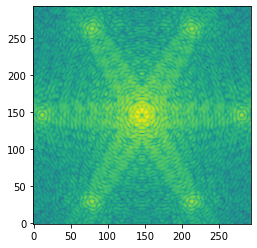

In [5]:
wf = heeps.pupil.pupil(**conf)
wf = heeps.optics.apodizer(wf, **conf)
plt.figure(); apo = show_wf(wf, 'amp', npupil=conf['npupil'])
wf = heeps.optics.fp_mask(wf, **conf)
plt.figure(); before_ls = show_wf(wf, 'amp', npupil=conf['npupil'])
wf = heeps.optics.lyot_stop(wf, **conf)
plt.figure(); after_ls = show_wf(wf, 'amp', npupil=conf['npupil'])
psf = heeps.optics.detector(wf, **conf)
psf /= peak
plt.figure(); plt.imshow(np.log10(psf), origin='lower');
fits.writeto('apo_misalign_pupil%s.fits'%apo_misalign, apo, overwrite=True)
fits.writeto('apo_misalign_before_ls%s.fits'%apo_misalign, before_ls, overwrite=True)
fits.writeto('apo_misalign_after_ls%s.fits'%apo_misalign, after_ls, overwrite=True)
fits.writeto('apo_misalign_psf%s.fits'%apo_misalign, psf, overwrite=True)